In [1]:
import numpy as np
import math
import cv2
from matplotlib import pyplot as plt
from PIL import Image

In [2]:
def print_img(img):
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()

Подготовка.
Создать три картинки 800х600px с белым фоном и разместить на них непересекающиеся: 100 одинаковых квадратов и 100 одинаковых прямоугольных равнобедренных треугольников (катет равен стороне квадрата) другого цвета следующим образом:
1-й рисунок) квадраты и треугольники образуют две непересекающиеся области, которые  визуально легко разделить прямой линией, 
2-й рисунок) квадраты и треугольники образуют две непересекающиеся области, которые  разделяются прямой линией, при этом достаточно большое фигур обоих типов близки к этой линии,
3-й рисунок) квадраты и треугольники образуют две пересекающиеся области, при этом в небольшом пересечении этих областей находится 6-10 фигур одного типа и 3-5 фигур другого типа. Остальные фигуры легко визуального разделяются прямой на две непересекающиеся области.

In [4]:
def draw_triangles(x0, y0, img):
    triangle_cnt = np.array([(x0, y0 - 4), (x0 + 6, y0 + 2), (x0 - 6, y0 + 2)])
    cv2.drawContours(img, [triangle_cnt], 0, (255, 0, 0), -1)


def draw_squares(x0, y0, img):
    cv2.rectangle(img, (x0 + 4, y0 - 4), (x0 - 4, y0 + 4), (0, 0, 255), -1)


100
100


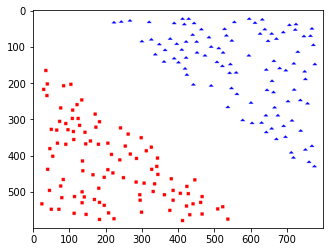

In [58]:
# 1-й рисунок
c = np.ones((600, 800, 3), np.uint8) * 255
tr = []
sq = []
A = 600
B = -800
C = 0
min_dist = 15

while len(tr)< 100 or len(sq) < 100:
    y = np.random.randint(20, 600 - 20)
    x = np.random.randint(20, 800 - 20)
    isok = True
    for t in tr:
        if math.sqrt((x - t[0])**2 + (y - t[1])**2) < min_dist:
            isok = False
            break
    for t in sq: 
        if math.sqrt((x - t[0])**2 + (y - t[1])**2) < min_dist:
            isok = False
            break
  #  print(abs(A * x + B * y + C)/ math.sqrt(A * A + B * B))
    if abs(A * x + B * y + C)/ math.sqrt(A * A + B * B) < 100:
        isok = False
    if isok == True:
        if x * A + y * B + C > 0 :
            if len(tr) < 100:
                tr.append((x,y))
                draw_triangles(x, y, c)
        else:
            if len(sq) < 100:
                sq.append((x,y))
                draw_squares(x, y, c)

print(len(tr))
print(len(sq))
print_img(c)

100
100


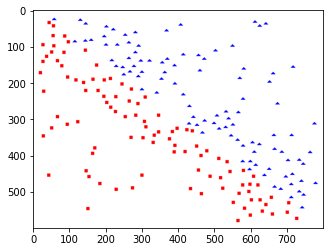

In [59]:
# формирование 2й картинки
tr1 = []
sq1 = []
const = 10
c1 = np.ones((600, 800, 3), np.uint8) * 255
A = 600
B = -800
C = 0
min_dist = 15

while len(tr1)< 100 or len(sq1) < 100:
    y = np.random.randint(20, 600 - 20)
    x = np.random.randint(20, 800 - 20)
    isok = True
    for t in tr1:
        if math.sqrt((x - t[0])**2 + (y - t[1])**2) < min_dist:
            isok = False
            break
    for t in sq1: 
        if math.sqrt((x - t[0])**2 + (y - t[1])**2) < min_dist:
            isok = False
            break
  #  print(abs(A * x + B * y + C)/ math.sqrt(A * A + B * B))
    if abs(A * x + B * y + C)/ math.sqrt(A * A + B * B) > 100:
        if np.random.randint(0,5) < 4:
            isok = False
    if isok == True:
        if x * A + y * B + C > 0 :
            if len(tr1) < 100:
                
                tr1.append((x,y))
                draw_triangles(x, y, c1)
        else:
            if len(sq1) < 100:
                sq1.append((x,y))
                draw_squares(x, y, c1)

print(len(tr1))
print(len(sq1))
print_img(c1)

100
100


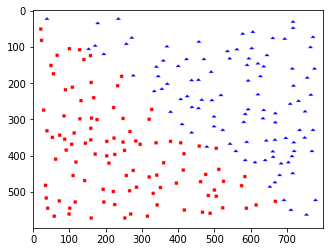

In [62]:
# формирование 3й картинки
tr2 = []
sq2 = []
const = 10
c2 = np.ones((600, 800, 3), np.uint8) * 255
A = 600
B = -800
C = 0
min_dist = 15
cnt_tr =0 
cnt_sq = 0 
while len(tr2)< 100 or len(sq2) < 100:
  #  print(len(tr2),len(sq2))
    y = np.random.randint(20, 600 - 20)
    x = np.random.randint(20, 800 - 20)
    isok = True
    for t in tr2:
        if math.sqrt((x - t[0])**2 + (y - t[1])**2) < min_dist:
            isok = False
            break
    for t in sq2: 
        if math.sqrt((x - t[0])**2 + (y - t[1])**2) < min_dist:
            isok = False
            break
    if isok == False:
        continue
  #  print(abs(A * x + B * y + C)/ math.sqrt(A * A + B * B))
    if abs(A * x + B * y + C)/ math.sqrt(A * A + B * B) < 20:
        if cnt_tr < 10 and len(tr2) < 100:
            cnt_tr += 1
            tr2.append((x,y))
            draw_triangles(x, y, c2)
        else:
            if cnt_sq < 5 and len(sq2) < 100:
                cnt_sq += 1 
                sq2.append((x,y))
                draw_squares(x, y, c2)
        continue
    if x * A + y * B + C > 0 :
        if len(tr2) < 100:
            tr2.append((x,y))
            draw_triangles(x, y, c2)
    else:
        if len(sq2) < 100:
            sq2.append((x,y))
            draw_squares(x, y, c2)

print(len(tr2))
print(len(sq2))
print_img(c2)

# Задание 1
Для каждого из рисунков методом k-средних разбить выборку треугольников и квадратов на два класса.

In [63]:
def klast(param1, param2):
    Z = np.vstack((param1, param2))
    Z = np.float32(Z)
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
    ret, label, center = cv2.kmeans(Z, 2, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    A = Z[label.ravel() == 0]
    B = Z[label.ravel() == 1]
    plt.scatter(A[:, 0], A[:, 1])
    plt.scatter(B[:, 0], B[:, 1], c='r')
    plt.scatter(center[:, 0], center[:, 1], s=60, c='y', marker='s')
    plt.xlabel('Weight'), plt.ylabel('Height')
    plt.show()

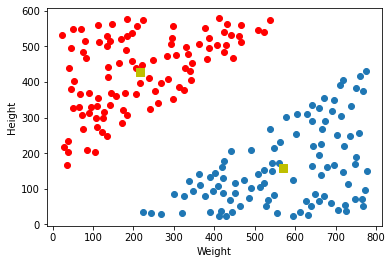

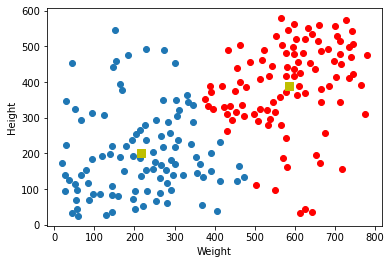

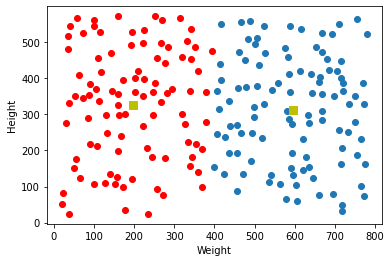

In [64]:
# Для первой картинки
klast(sq, tr)

# для второй картинки
klast(sq1, tr1)

# для третей катринки
klast(sq2, tr2)

# Задание 2
На каждой картинке разместить 9 кругов (диаметр равен стороне квадрата): по 3 круга в первой области, во второй области, в пересечении областей или близко к линии разделения областей. Провести классификацию кругов методом k ближайших соседей.

In [88]:
const = 10
min_dist = 15
A = 600
B = -800
C = 0
def find_circles(s, tt):
    arr = []
    while len(arr) < 3:
        x = np.random.randint(20, 600 - 20)
        y = np.random.randint(20, 800 - 20)
        if (A * x + B * y +  C) /  math.sqrt(A*A+B*B) <= 100:
            continue
        isok = True
        for t in s:
            if math.sqrt((x - t[0])**2 + (y - t[1])**2) < min_dist:
                isok = False
                break
        for t in tt: 
            if math.sqrt((x - t[0])**2 + (y - t[1])**2) < min_dist:
                isok = False
                break
        if isok  == False:
            continue
        arr.append((x, y))
    while len(arr) < 6:
        x = np.random.randint(20, 600 - 20)
        y = np.random.randint(20, 800 - 20)
        if (A * x + B * y +  C) /  math.sqrt(A*A+B*B) >= -100 :
            continue
        isok = True
        for t in s:
            if math.sqrt((x - t[0])**2 + (y - t[1])**2) < min_dist:
                isok = False
                break
        for t in tt: 
            if math.sqrt((x - t[0])**2 + (y - t[1])**2) < min_dist:
                isok = False
                break
        if isok  == False:
            continue
        arr.append((x, y))
    while len(arr) < 9:
        x = np.random.randint(20, 600 - 20)
        y = np.random.randint(20, 800 - 20)
        if abs(A * x + B * y +  C) /  math.sqrt(A*A+B*B) > 100:
            continue
        isok = True
        for t in s:
            if math.sqrt((x - t[0])**2 + (y - t[1])**2) < min_dist:
                isok = False
                break
        for t in tt: 
            if math.sqrt((x - t[0])**2 + (y - t[1])**2) < min_dist:
                isok = False
                break
        if isok  == False:
            continue
        arr.append((x, y))
    return arr


In [89]:
cir = find_circles(sq, tr)
cir1 = find_circles(sq1, tr1)
cir2 = find_circles(sq2, tr2)

In [90]:
def find_class(cr, s, t):
    # array of centers triangles and squares
    trainData = (np.vstack((s, t))).astype(np.float32)

    # array of classes marks
    responses = []
    for i in range(200):
        if i < 100:
            responses.append(0)
        else:
            responses.append(1)
    responses = (np.vstack(responses)).astype(np.float32)

    # В trainData попадут красные треугольники (responses.ravel()==0):
    red = trainData[responses.ravel() == 0]
    # plt.scatter(x, y, s=None, c=None, marker=None,...)
    
    # x, y – координаты точки,s–величина маркера, c–цвет,  marker–маркер
    plt.scatter(red[:, 0], red[:, 1], 20, 'r', '^')

    # Take Blue families and plot them
    blue = trainData[responses.ravel() == 1]
    plt.scatter(blue[:, 0], blue[:, 1], 20, 'b', 's')

    # Добавим один новый объект для классификации, можно несколько
    newcomer = (np.vstack(cr)).astype(np.float32)
    plt.scatter(newcomer[:, 0], newcomer[:, 1], 20, 'g', 'o')
    plt.show()
    knn = cv2.ml.KNearest_create()
    knn.train(trainData, cv2.ml.ROW_SAMPLE, responses)
    ret, results, neighbours, dist = knn.findNearest(newcomer, 5)  
    print("result: ", results)
    print("neighbours: ", neighbours)
    print("distance: ", dist)

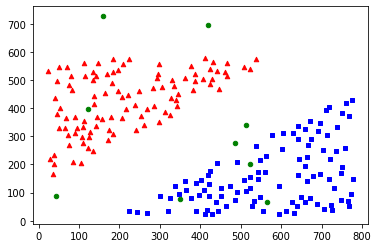

result:  [[1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]]
neighbours:  [[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0.]]
distance:  [[  333.   650.   738.  1325.  2312.]
 [  720.  1049.  1261.  2305.  2330.]
 [  685.  1114.  1145.  1613.  2581.]
 [  586.  1360.  1681.  1690.  2372.]
 [13520. 17568. 20072. 22585. 24345.]
 [23330. 27378. 27421. 30433. 30865.]
 [ 2682.  4649.  6977.  7442.  7801.]
 [ 5725.  5954.  9305. 14381. 14824.]
 [ 6481. 13714. 16484. 17524. 17649.]]
[(351, 76), (523, 203), (566, 65), (121, 396), (420, 695), (160, 727), (486, 276), (512, 340), (44, 86)]


In [91]:
find_class(cir, sq, tr)
print(cir)

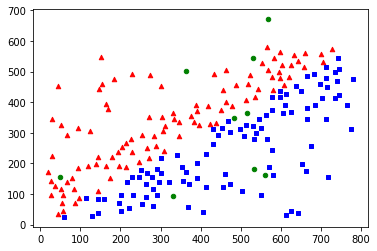

result:  [[1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]]
neighbours:  [[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [1. 1. 0. 0. 1.]
 [0. 0. 0. 0. 0.]
 [1. 1. 1. 0. 0.]]
distance:  [[ 1469.  2842.  5440.  5882.  5904.]
 [ 1706.  2237.  2665.  3029.  3125.]
 [  400.   757.  4090.  5864.  7213.]
 [  666.  2381.  2705.  2969.  2980.]
 [ 5141.  6178.  8065. 10217. 12370.]
 [ 8480. 12349. 16072. 17893. 20381.]
 [  346.  1445.  1530.  1637.  1658.]
 [  613.   709.   909.   985.  1097.]
 [ 1224.  1378.  1906.  1945.  2041.]]
[(532, 182), (332, 93), (561, 161), (531, 544), (363, 501), (569, 671), (482, 348), (49, 156), (516, 363)]


In [92]:
plt.show()
find_class(cir1, sq1, tr1)
print(cir1)

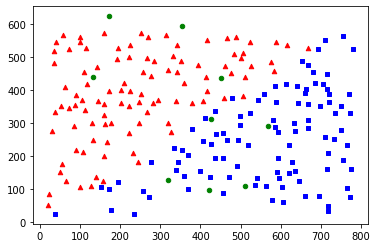

result:  [[1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]]
neighbours:  [[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 0.]]
distance:  [[ 1433.  1609.  2626.  3881.  4201.]
 [  265.   505.   832.  3797.  4306.]
 [  601.  1525.  2410.  2500.  3466.]
 [ 2722.  9028.  9325.  9601. 10660.]
 [ 2329.  3533.  5780.  8485.  8676.]
 [  709.   754.   922.  3380.  4789.]
 [ 1184.  1642.  3185.  3541.  4640.]
 [  881.  1385.  1417.  2906.  3725.]
 [  229.   746.  2169.  2664.  3170.]]
[(420, 95), (569, 289), (512, 108), (171, 623), (355, 594), (133, 440), (320, 128), (451, 436), (426, 312)]


In [93]:
find_class(cir2, sq2, tr2)
print(cir2)